In [2]:
import scipy.constants as c
import scipy.integrate as sci
import scipy.optimize as sco

<h5>Problem 1</h5>
Calculate the potential of 10 cc water in a beaker containing an excess of 1 gr. ion/liter of 
positive ions. For simplicity assume a spherical geometry. (Note that $10^{‐8}$ gr. ions/liter is 
just below our conventional means of detection. Also note that electroneutrality is not a 
fundamental law of nature.) 
(The purpose of this problem is to demonstrate the validity of the electroneutrality 
approximation)

In [3]:
V = 10*c.milli*c.liter
#V = 4/3 *pi*r**3
r = (3/4*V/pi)**(1/3)
#\nabla^2 \phi = 0
#\nabla \phi = E
#Use any book on electrostatics or physics. What is the charge of a sphere
#integrate \phi from r to \infty to get the potential
#Voltage in the sphere is going to be constant.

#Assume H3O+ ion is the only ion present.
MWion = 19. *c.gram/19
densityIons = 1* c.gram /c.liter
nIons = V*densityIons/MWion #moles ion
F = c.physical_constants['Faraday constant'][0]
q = F*nIons #Coulombs
e0 = c.epsilon_0
Voltage = q/(4*pi*e0*r) - q/(4*pi*e0*np.inf)
print("The charge on the sphere is {:.3g} Volts, or {:,.5g} teravolts"\
      .format(Voltage,Voltage/c.tera))

The charge on the sphere is 6.49e+14 Volts, or 648.83 teravolts


<h5>Problem 2</h5>
Estimate the conductivity of water at: 
    1. pH = 13 (basic) 
    2. pH =  7 (neutral) 
    3. pH =  1 (acidic) 
Assume only H+ and OH‐ are present and contribute to the conductivity.  (Is this a good assumption?)  Remember: 
[H+][OH-] =  10‐14 (always). Also,  recall that pH = ‐log[H+]. 
(The purpose of this problem is to demonstrate the different mobilities of H+
 and OH‐
 and 
the fact that pure water is highly resistive.) 

In [4]:
pH=np.array([13.,7,1])
pOH  = 14 - pH
H = 10**(-pH)
OH = 10**(-pOH)
lambdaH = 350
lambdaOH = 200
kappa = (lambdaH*H + lambdaOH*OH)/1000
print("Assuming a total [H+][OH-] of 10^-14:")
for i in range(len(kappa)):
    print("\tpH = {:}, conductivity = {:.2g} S/cm".format(pH[i],kappa[i]))

Assuming a total [H+][OH-] of 10^-14:
	pH = 13.0, conductivity = 0.02 S/cm
	pH = 7.0, conductivity = 5.5e-08 S/cm
	pH = 1.0, conductivity = 0.035 S/cm


<h5>Problem 3</h5>
Estimate the conductivity of 0.5 M aqueous solution of cupric sulfate at pH 2 and compare 
it to the same solution at pH =0. 

In [5]:
pH=np.array([2.,0])
pOH  = 14 - pH
H = 10**(-pH)
OH = 10**(-pOH)
lambdaSO4 = 79.6
lambdaCu = 55
CuSO4 = Cu = 0.5
SO4 = Cu + (H-OH)/2
zCu = zSO4 = 2
kappa = (lambdaSO4 *zSO4* SO4 + lambdaCu* zCu*Cu + H*lambdaH + OH*lambdaOH)/1000
kappa2 = (lambdaSO4 *zSO4* CuSO4 + lambdaCu* zCu*CuSO4 + H*lambdaH + OH*lambdaOH)/1000
print("Assuming that the pH is caused by an excess of sulfate anions (sulfuric acid):")
for i in range(len(kappa)):
    print("\tpH = {:}, conductivity = {:.3g} S/cm".format(pH[i],kappa[i]))
print("Assuming that the pH difference is caused by magic:")
for i in range(len(kappa)):
    print("\tpH = {:}, conductivity = {:.3g} S/cm".format(pH[i],kappa2[i]))


Assuming that the pH is caused by an excess of sulfate anions (sulfuric acid):
	pH = 2.0, conductivity = 0.139 S/cm
	pH = 0.0, conductivity = 0.564 S/cm
Assuming that the pH difference is caused by magic:
	pH = 2.0, conductivity = 0.138 S/cm
	pH = 0.0, conductivity = 0.485 S/cm


<h5>Problem 4</h5>
Assuming  crystallographic  radii  (see  data  below),  and  Stokes  resistance  to movement  of 
spherical charge, determine the following: 
 1. Mobilities of Na+ and Cl‐ (Both absolute and relative mobilities). 
 2. Using the mobilities from part (a), estimate the conductivity of 1 molar NaCl at 25$^\circ$C. 
 3. Compare your results from parts (a) and (b) with the following experimental values: 
 
     $\lambda^\circ$Na+ = 43.5               $\lambda^\circ$Cl‐ = 65.5        [Ω‐1cm2/mole]
     
     $\Lambda$NaCl (1M) = 74.35 [ Ω‐1cm2/mole].
     
    If there is a difference, please explain. 
 4. Compare the data given in (c) with the rough estimate method discussed in class: 
 
 $\lambda^+ = \lambda^- \approx 50$;
 
 $\lambda H^+ \approx 350$
 
 $\lambda OH-=200$.
 
 Notice how much less effort is required. 
 
 Data
 
 e0 = 1.602 x 10‐19 [cb/electron]
 
 μ = 0.01 [gr. cm‐1 sec‐1]
 
 rNa+ = 0.95 Ǻ  rCl‐= 1.8 Ǻ 

(The purpose of this problem is (1) to remind you of the simplicity of estimating 
conductivities with reasonable accuracy and (2) to acquire experience in handling physical 
parameters with different units)  

In [7]:
e0 = 1.602e-19 #Coulombs/electron
MW = np.array([22.9898,35.453 ])*c.gram
mu = 0.01 /c.centi*c.gram #/MW #gram->mole/cm->m/sec
r = np.array([0.95,1.8])*c.angstrom #angs->m
rLabel = ['Na+','Cl-']
z = np.array([1,-1])
mobility = e0*z/(6*pi*mu*r)#C/el/(kg/sec) = C s/(kg)
absmobil = e0/(6*pi*mu*r*F)
for i in range(len(mobility)):
    lab = rLabel[i]
    mobil=mobility[i]
    print("The relative mobility of {:} is {:>6.2e} cm^2/(V sec)"\
          .format(lab,float(mobil/c.centi**2)))
print()
for i in range(len(mobility)):
    lab = rLabel[i]
    absmob=absmobil[i]
    print("The absolute mobility of {:} is {:.3g} (cm^2 mole)/(J sec)"\
          .format(lab,float(absmob/c.centi**2)))
kPH7 = 1e-7 * lambdaH + 1e-7*lambdaOH
C = 1/c.liter
kappa = F**2*(C*absmobil[0] + C*absmobil[1])+kPH7*c.centi
print("","(b)",sep="\n")
print("The conductivity of 1 Molar NaCl is {:,.3f} S/(Ω cm)".format(kappa*c.centi))
print("","(c)",sep="\n")
lamdas = np.array([43.5,65.5])*c.centi**2
for i in range(len(absmobil)):
    print("The lambda of {:} is {:.2g}, which is {:.2%} off from my estimate, which was {:.2g}"\
          .format(rLabel[i],\
        lamdas[i],abs(absmobil[i]*F**2- lamdas[i])/lamdas[i],absmobil[i]*F**2),sep='\n')
print("The differences come from the solvated radii, as opposed to the \n\
        crystallographic radii. H3O+ will be attracted to the \n\
      sodium ions more because they have a more concentrated charge, which will make them larger")

kappaEst = 1e-7*350 + 1e-7*200 + 1*50 + 1*50
print("","(d)","The approximated conductivity is {:.2f} S/cm"\
      .format(kappaEst*c.liter),sep="\n")

The relative mobility of Na+ is 8.95e-04 cm^2/(V sec)
The relative mobility of Cl- is -4.72e-04 cm^2/(V sec)

The absolute mobility of Na+ is 9.27e-09 (cm^2 mole)/(J sec)
The absolute mobility of Cl- is 4.89e-09 (cm^2 mole)/(J sec)

(b)
The conductivity of 1 Molar NaCl is 0.132 S/(Ω cm)

(c)
The lambda of Na+ is 0.0044, which is 98.43% off from my estimate, which was 0.0086
The lambda of Cl- is 0.0066, which is 30.45% off from my estimate, which was 0.0046
The differences come from the solvated radii, as opposed to the 
        crystallographic radii. H3O+ will be attracted to the 
      sodium ions more because they have a more concentrated charge, which will make them larger

(d)
The approximated conductivity is 0.10 S/cm


<h5>Problem 5</h5>
We have calculated in class the steady‐state velocity of an ion subject to an electric field. I 
am now interested in determining its acceleration period till it reaches this steady state. 
Assume that an ion (assume Na+) is suddenly being subject to an electric field of 1 V/cm in 
dilute aqueous solution (=1cp [=10‐2 poise=10‐2 g cm‐1s
‐1]).  
1. Estimate the ion’s steady‐state velocity
2. Use Newtonian mechanics to determine the ion acceleration assuming a drag force 
that follows Stokes law.  
3. How long will it take for the ion to reach its steady‐state velocity?  
4. What is the time constant the ion acceleration? The time constant is defined as the 
time that is required to reach 63.2% of the steady‐state velocity.    
5. How far will the ion travel before reaching 90% of its terminal velocity?  
Data for Na+
 ion: r=1.8 A; q=1.6x10‐19 C; m=3.82x10‐23 g.  
Find any other parameters that you may need in textbooks, notes, the web, etc. 

We have electrical force with the equation from class
$$F_d = 6\pi \mu r v$$
$$\Sigma F = ma$$
$$q\frac{dV}{dx} - F_d$$, where $v_0=0$. As the velocity builds up, the acceleration drops. 

We typically ask, what is the time constant, because things don't really reach steady state. Use $\tau=t(v_{63\%})$

Integrate it


The steady state velocity is 4.7e-06 m/s


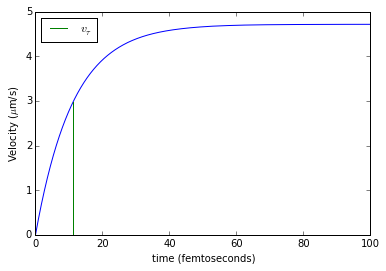

The ion will never actually reach its steady state velocity. (t=infinity)
The time to reach 63.2% of steady state velocity is 11.3 femtoseconds
The ion will travel 7e-20 meters (74.41 zm) before reaching 90% of its terminal velocity


In [9]:
dVdx = 1/c.centi
mu = 1e-2/c.centi*c.gram
r = 1.8*c.angstrom
q = 1.6e-19
m = 3.82e-23*c.gram
#Fd = 6*pi*mu*r*vss
vss = q*dVdx/(6*pi*mu*r)
def dxdt(x,t):
    dx = np.zeros(2)
    dx[0] = x[1]
    dx[1] = (q*dVdx - 6*pi*mu*r*x[1])/m
    return dx
x = np.array([0,0])
t = np.linspace(0,.1e-12,10000)
x = sci.odeint(dxdt,x,t)
#print(x)
def vsteady(tEnd):
    t = np.array([0,tEnd*c.femto])
    x = np.array([0,0])
    return (sci.odeint(dxdt,x,t)[1,1] - vss*.632)*1e6
def xsteady(tEnd):
    t = np.array([0,tEnd*c.femto])
    x = np.array([0,0])
    return (sci.odeint(dxdt,x,t)[1,1] - vss*.90)*1e7
tSS = sco.fsolve(vsteady,1.126e-2)*c.femto
print("The steady state velocity is {:.2g} m/s".format(vss))
plt.plot(t/c.femto,x[:,1]/c.micron)
plt.plot(np.array([tSS,tSS])/c.femto,np.array([0,vss*0.632])/c.micron,label='$v_{\\tau}$')
plt.legend(loc='best')
plt.xlabel("time (femtoseconds)")
plt.ylabel("Velocity ($\mu$m/s)")
plt.show()
print("The ion will never actually reach its steady state velocity. (t=infinity)")
print("The time to reach 63.2% of steady state velocity is {:.1f} femtoseconds"\
      .format(float(tSS)/c.femto))
t90 = sco.fsolve(xsteady,1.126e-2)*c.femto
x90 = sci.odeint(dxdt,np.array([0,0]),np.array([0,t90]))[1,0]
print("The ion will travel {:.1g} meters ({:.2f} zm) before reaching 90% of \
its terminal velocity"\
      .format(x90,x90/c.zepto))
v2 = sci.odeint(dxdt,np.array([0,0]),np.array([0,1.126e-14]))[1,1]#tSS]))[1,1]